## Mental Health and Social Media Consumption - STA141B Final Project


### Group members:
    Samir Cochinwala
    Zain Khalid
    Sriram Subramanian
    Russell Chien

## Table of Contents

0. Imports
1. Introduction
2. Cleaning Dataset
2. Statistical Visualization
3. NLP analysis 
4. API / Web Scraping > we can do something similar to hw4 where we filter out meaningless words and find some sort of significance through sentences
5. Regression / KNN / random forest / and other models
6. Conclusion / Results

### Imports

In [4]:
!conda install -c anaconda seaborn -y


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.13.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/samircochinwala/opt/anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           5 KB  anaconda
    bottleneck-1.3.4           |   py38h67323c0_0         129 KB  anaconda
    brotli-1.0.9               |       hb1e8313_2         428 KB  anaconda
    conda-4.13.0               |   py38hecd8cb5_0         988 KB  anaconda
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB  anaconda
    fonttools-4.25.0           |     pyhd3eb1b0_0         674 KB  anaconda
    intel-openmp-2021.4.0      |    hecd8cb5_3538         1.2 MB  anaconda
    kiwiso

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from unittest.mock import MagicMock
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image


### Introduction

In 2023, you have 5 year olds who use iPhones, iPads, computers, etc. for multiple hours everyday. On top of this, being aware of your own mental health isn't particularly common. Our day to day lives consist of staring at Instagram, Facebook, Tiktok, etc. But how often do you hear about someone who journals about their feelings, for example. Our motivation behind this project came by reflecting on our daily rituals. We learned that we all woke up and checked our phones, we learned that our study breaks consisted of social media consumption. But we didn't know the impact this had on us. Although social media is a great method of obtaining information in the world, we believe it comes with effects that change your mental health. Social media consumption is extremely high relative to the past. According to: https://www.smartinsights.com/social-media-marketing/social-media-strategy/new-global-social-media-research/#:~:text=The%20number%20of%20social%20media,growth%20of%20%2B137%20million%20users there is a 10% growth YOY of global social media consumption. At first glance, you might think nothing of it, but our projects goal is to reveal the effect social media has on mental health. We will try to find the optimal amount of social media consumption per day as well as clarify the impacts social media has on ones mental health. The goal for this project is to learn about the correlation between social media and mental health and to make people of every age group aware.

### Raw Dataset Rundown

The dataset below is taken from a survey during COVID-19 and was performed in numerous different cities in China. There were multiple questions asked about family relationships, levels of boredom, the epidemic, social media consumption, and mental health states. The dataset contains 917 rows with 88 columns. This meaning there were 917 people who were surveyed and each asked ~88 questions. By analyzing social media consumption and mental health responses we will predict what level/types of social media are healthy. 

When looking through the dataset, we can clean the data by fixing any typos and renaming columns to be more descriptive. We also combined the traditional media use and new media use into one column, tracking total media use. 

In [11]:

df = pd.read_excel('/Users/samircochinwala/Downloads/sta141b_final/STA141B.xlsx')

df = df.rename(columns={'familymebers': 'familymembers', 'PA': 'Positive Affect', 'NA': 'Negative Affect', 'DA': 'Death Anxiety', 
                        'ML': 'Meaning in Life', 'DEP': 'Depression', 'ANX': 'Anxiety', 'STR': 'Stress', 'NEW': 'New Media Use', 
                        'TRA': 'Traditional Media Use', 'EMP': 'Empathy', 'SYM': 'Sympathy', 'search': 'Search', 
                        'optimism': 'Optimism', 'effect': 'Impact', 'post': 'Post'})
df['Media Use'] = df['Traditional Media Use'] + df['New Media Use']
df['Boredom'] = df['boredom1'] + df['boredom2'] + df['boredom3']


print(df.head())
print(df.columns)

   familymembers location  infection  Impact  familyreunion  \
0              3  Tianjin          0       4              1   
1              4    Gansu          0       4              1   
2              3    Hunan          0       4              1   
3              4   Shanxi          0       3              1   
4              4   Shanxi          0       4              1   

   familyrelationship  Post  Search  boredom1  boredom2  ...  Meaning in Life  \
0                   5     1       2         6         6  ...               24   
1                   4     1       4         6         6  ...               27   
2                   4     0       4         1         1  ...               20   
3                   4     1       4         5         5  ...               22   
4                   4     0       4         7         7  ...               23   

   Depression  Anxiety  Stress  New Media Use  Traditional Media Use  Empathy  \
0          10       13      15              4        

### Heatmap



Using seaborn, we can create a heatmap to visualize the correlation between numeric variables in our dataset. With our heatmap, we can clearly see which variables have a high correlation with each other. Specifically, we can see that there is a high correlation between Death Anxiety and Empathy and Negative Affect and Empathy. Some other interesting observations include that those who saw a positive affect in the pandemic also scored their meaning of life questions higher. 

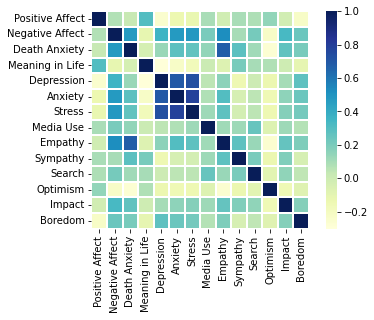

In [12]:
heatmap = df[['Positive Affect', 'Negative Affect', 'Death Anxiety', 'Meaning in Life', 'Depression', 'Anxiety', 'Stress', 
              'Media Use', 'Empathy', 'Sympathy', 'Search', 'Optimism', 'Impact', 'Boredom']] 
corrMatrix = heatmap.corr()
sns.heatmap(corrMatrix, cmap="YlGnBu", linewidths=.1, square=True)
plt.show()

Categorial variables: family renuion, post
    

### Scatterplot

We created scatterplots to look for correlation between searching social media and its positive/negative affect it had on users. There seemed to be a even distribution amongst all levels. The dominant answer to the question "Did you actively search for updates on epidemic-related news", was '4' (everyday), which clearly shows the importance of social media to our daily lives. People who answered '4' also had the widest range of positive/negative affect. 

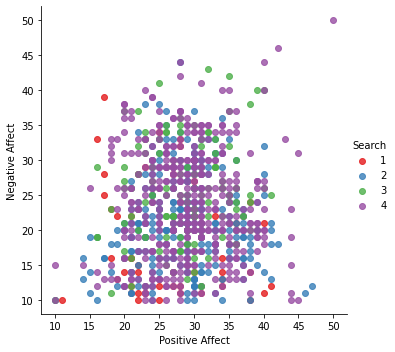

In [13]:
search_df = df[["Positive Affect","Negative Affect","Search"]]
sns.lmplot(x='Positive Affect', y='Negative Affect', data = search_df, hue='Search', fit_reg=False, palette="Set1")

Next, we looked at the relationship between media use, negative affect, and impact COVID had on a person's life. Many people that said COVID did not have a very big impact on their life (< 3) also had higher media use and lower negative affect. While this may suggest that media use may have a positive effect, it is also possible that these people are simply prefer staying inside and do not have the need to meet with people as often. Those that said COVID did have a big impact on their life (> 3) are skewed left towards media use. The negative affect of this group is roughly evenly distributed; perhaps an increase in media use could reduce the negative affect and/or impact of people who answered that COVID did have a big impact on their life. 

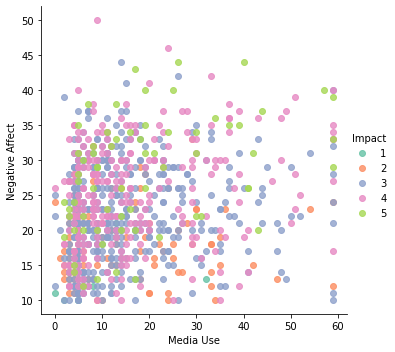

In [14]:
effect_df = df[["Media Use", "Negative Affect", "Impact"]]
sns.lmplot(x='Media Use', y='Negative Affect', data = effect_df, hue='Impact', fit_reg=False, palette="Set2")

### Countplot

We used Seaborn countplots to visualize certain variables and their relationship with the impact of COVID on a person's life. In the first plot, it seems that posting COVID related media does not influence the impact at all. In the second plot, we can clearly see that those who were impacted greatly by COVID have an overall higher boredom. In the third plot, as the amount of searching done increases, the impact of COVID also increases. In the fourth plot, 

<AxesSubplot:xlabel='Optimism', ylabel='count'>

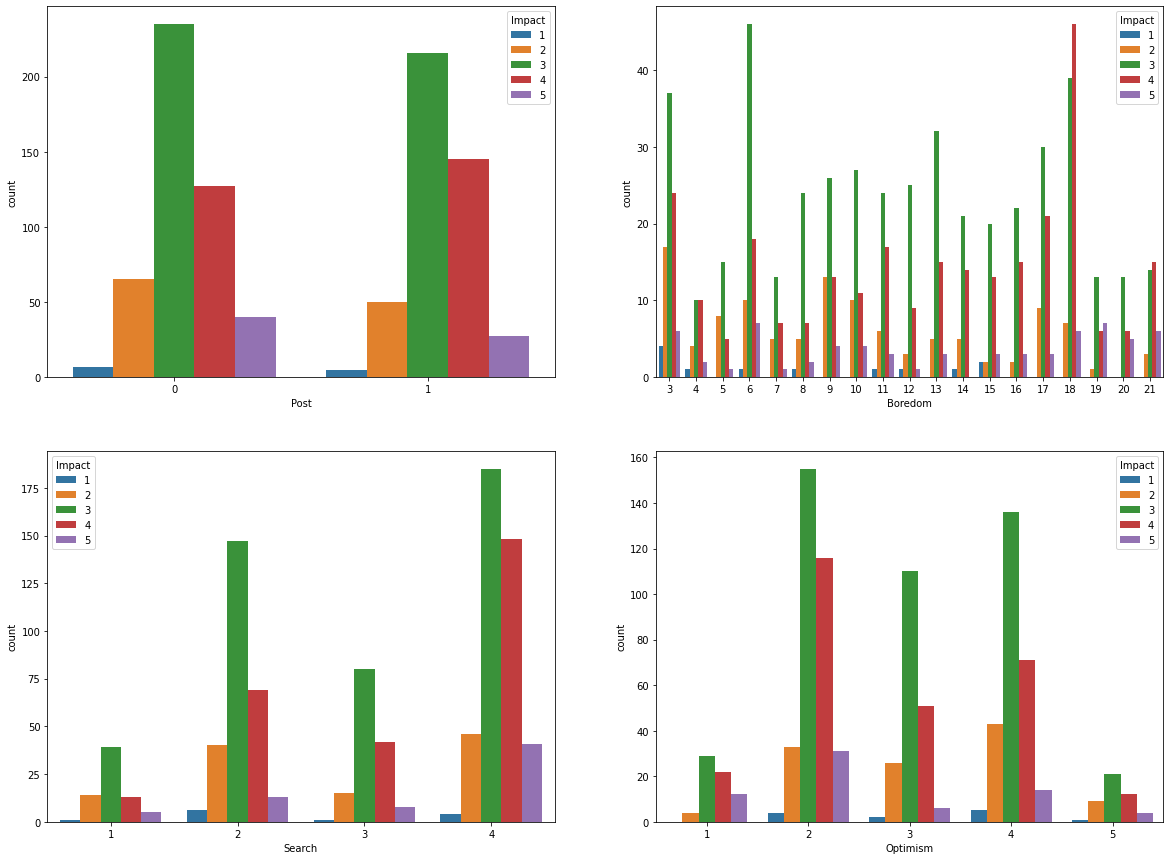

In [15]:
fig,[[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=[20,15])
sns.countplot(x='Post', data = df, hue='Impact', ax=ax1)
sns.countplot(x='Boredom', data = df, hue='Impact', ax=ax2)
sns.countplot(x='Search', data = df, hue='Impact', ax=ax3)
sns.countplot(x='Optimism', data = df, hue='Impact', ax=ax4)

## Models

#### Making Training and Testing Data

In [16]:
# making train/test data 

features = df[['Negative Affect','Death Anxiety', 'Depression']].copy() #'Anxiety', 'Stress']].copy()
X = features 
y = df['Media Use']
print(X)
print(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)
print(x_train)



     Negative Affect  Death Anxiety  Depression
0                 24             16          10
1                 19             14           7
2                 15              6           8
3                 21             16           9
4                 30             17          10
..               ...            ...         ...
912               21             15           7
913               28             14           9
914               16             10          11
915               17             15          12
916               26             14           9

[917 rows x 3 columns]
0       5
1      36
2       3
3       5
4      12
       ..
912    47
913     9
914    13
915     3
916    13
Name: Media Use, Length: 917, dtype: int64
     Negative Affect  Death Anxiety  Depression
710               15              9           8
912               21             15           7
914               16             10          11
590               11              6           8
887    

### RandomForest Model/Classifier

In [17]:
# making random forest model and training it 
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)
y_pred_rf = clf_rf.predict(x_test)

In [18]:
# checking accuracy 
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)


Accuracy: 0.05434782608695652


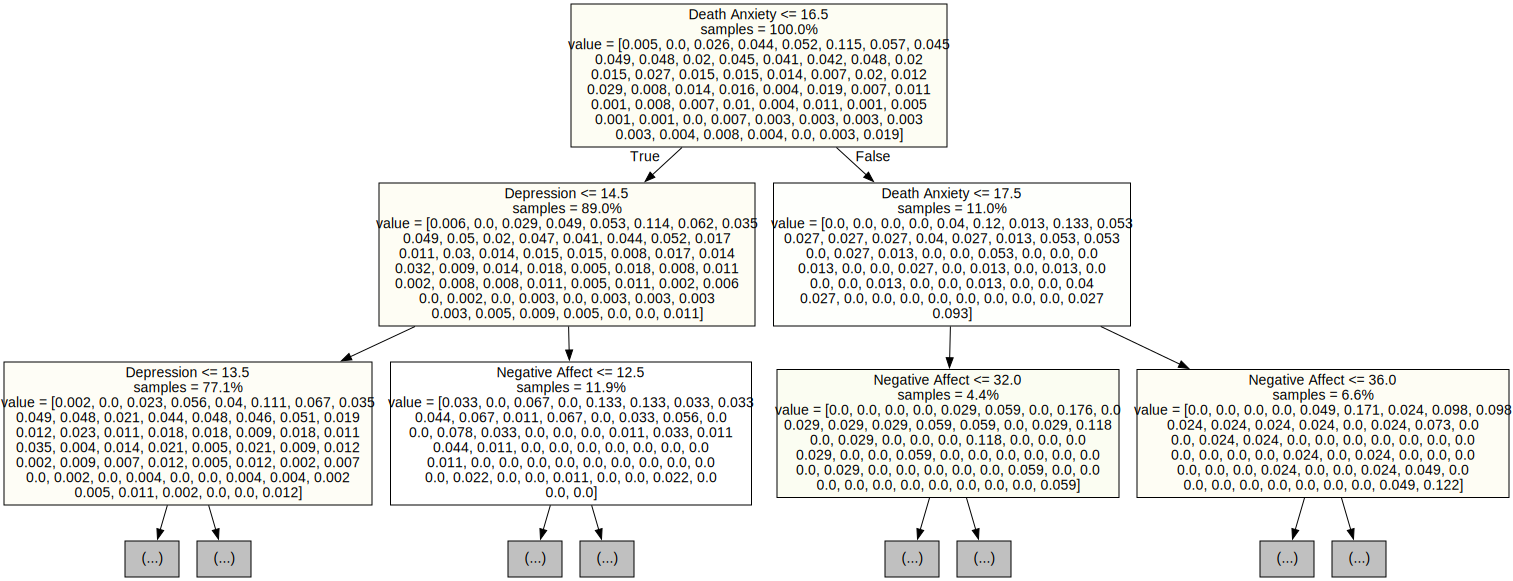

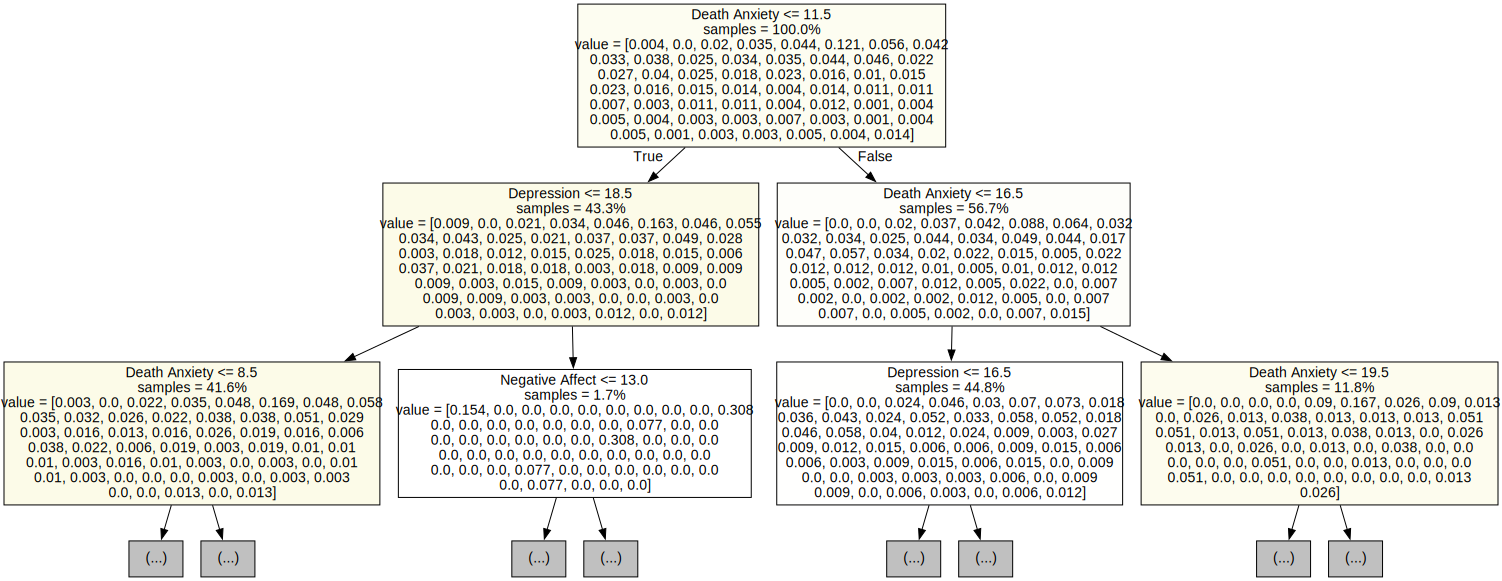

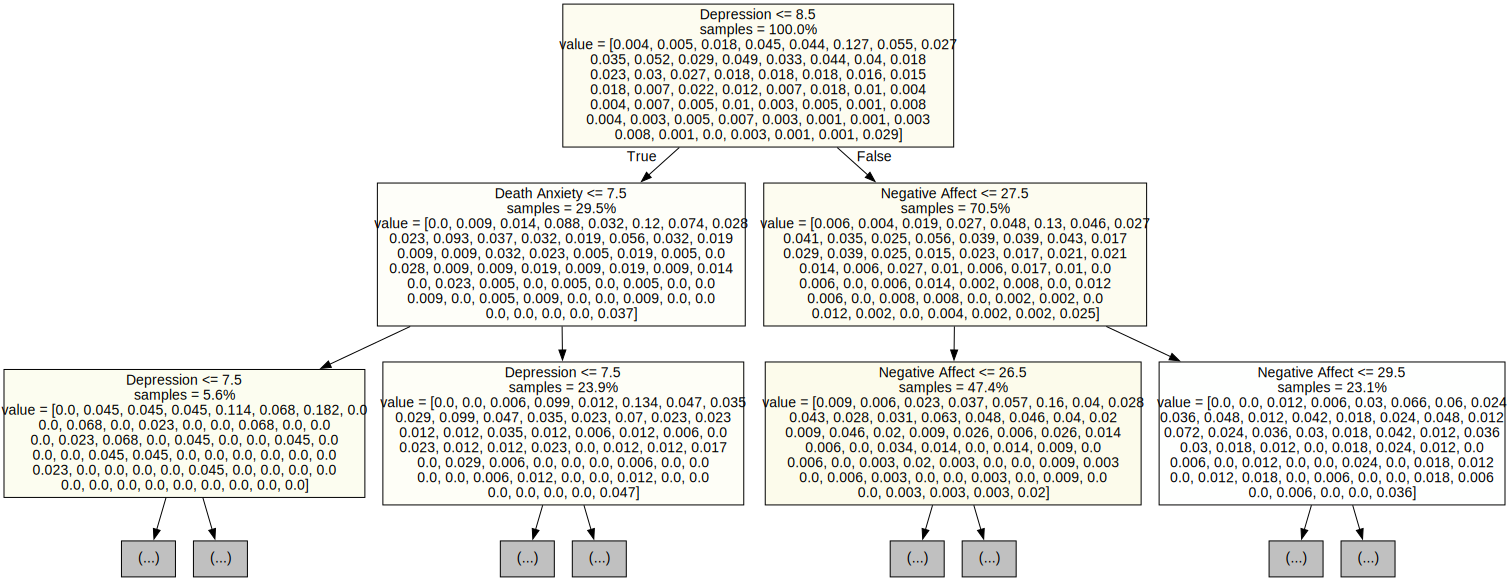

In [21]:
# this is just a cool visualization to show how random forest generated all the possible trees. 

for i in range(3):
    tree = clf_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)